# Introduction
This tutorial go through the "glob" file-finding tool, the for loop, and finally show some examples using them to generate plots of 1-D curves.

# Import common tools

In [1]:
import numpy as np, os, glob
# plotting
%matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,6)

# Python Glob: find files

glob is a powerful tool for finding files in the file system.
It is useful when you need to look for a list of files with names matching a pattern. 
For example, a list of filenames that all have a certain extension, prefix, or some common strings in the middle.

**Advanced:** The pattern rules for glob are not regular expressions. Instead, they follow standard Unix path expansion rules.

See https://docs.python.org/2/library/glob.html


In [2]:
import glob

In [3]:
!find Data/Glob

Data/Glob
Data/Glob/b2.dat
Data/Glob/f7.txt
Data/Glob/f9.txt
Data/Glob/f8.txt
Data/Glob/f1.txt
Data/Glob/f6.txt
Data/Glob/a1.dat
Data/Glob/b4.dat
Data/Glob/b3.dat
Data/Glob/f5.txt
Data/Glob/a2.dat
Data/Glob/f2.txt
Data/Glob/subdir1
Data/Glob/subdir1/x1.doc
Data/Glob/subdir1/x2.doc
Data/Glob/subdir1/x3.pdf
Data/Glob/b1.dat
Data/Glob/f3.txt
Data/Glob/f4.txt
Data/Glob/a3.dat
Data/Glob/subdir2
Data/Glob/subdir2/script.sh
Data/Glob/subdir2/program.py
Data/Glob/subdir2/cool.app


## Match extension

In [4]:
glob.glob('Data/Glob/*.dat')

['Data/Glob/b2.dat',
 'Data/Glob/a1.dat',
 'Data/Glob/b4.dat',
 'Data/Glob/b3.dat',
 'Data/Glob/a2.dat',
 'Data/Glob/b1.dat',
 'Data/Glob/a3.dat']

In [5]:
file_list = glob.glob('Data/Glob/*.txt')
file_list

['Data/Glob/f7.txt',
 'Data/Glob/f9.txt',
 'Data/Glob/f8.txt',
 'Data/Glob/f1.txt',
 'Data/Glob/f6.txt',
 'Data/Glob/f5.txt',
 'Data/Glob/f2.txt',
 'Data/Glob/f3.txt',
 'Data/Glob/f4.txt']

In [6]:
# Sorting
file_list = sorted(file_list)
file_list

['Data/Glob/f1.txt',
 'Data/Glob/f2.txt',
 'Data/Glob/f3.txt',
 'Data/Glob/f4.txt',
 'Data/Glob/f5.txt',
 'Data/Glob/f6.txt',
 'Data/Glob/f7.txt',
 'Data/Glob/f8.txt',
 'Data/Glob/f9.txt']

## Match prefix

In [7]:
glob.glob('Data/Glob/a*')

['Data/Glob/a1.dat', 'Data/Glob/a2.dat', 'Data/Glob/a3.dat']

# For Loop

In [8]:
file_list = glob.glob('Data/Glob/*.txt')
for file in file_list:
    print(file)

Data/Glob/f7.txt
Data/Glob/f9.txt
Data/Glob/f8.txt
Data/Glob/f1.txt
Data/Glob/f6.txt
Data/Glob/f5.txt
Data/Glob/f2.txt
Data/Glob/f3.txt
Data/Glob/f4.txt


In [9]:
for i, file in enumerate(file_list):
    print(i, file)

0 Data/Glob/f7.txt
1 Data/Glob/f9.txt
2 Data/Glob/f8.txt
3 Data/Glob/f1.txt
4 Data/Glob/f6.txt
5 Data/Glob/f5.txt
6 Data/Glob/f2.txt
7 Data/Glob/f3.txt
8 Data/Glob/f4.txt


In [10]:
N = len(file_list)
for i in range(N):
    print(i, file_list[i])

0 Data/Glob/f7.txt
1 Data/Glob/f9.txt
2 Data/Glob/f8.txt
3 Data/Glob/f1.txt
4 Data/Glob/f6.txt
5 Data/Glob/f5.txt
6 Data/Glob/f2.txt
7 Data/Glob/f3.txt
8 Data/Glob/f4.txt


## while loop

In [11]:
N = len(file_list)
i = 0
while i<N:
    print(i, file_list[i])
    i+=1

0 Data/Glob/f7.txt
1 Data/Glob/f9.txt
2 Data/Glob/f8.txt
3 Data/Glob/f1.txt
4 Data/Glob/f6.txt
5 Data/Glob/f5.txt
6 Data/Glob/f2.txt
7 Data/Glob/f3.txt
8 Data/Glob/f4.txt


# Dictionary

A dictionary is a map of key:value pairs. It allows for indexing of a bunch of objects.
Each key therefore has to be uniqe, and usually we use strings or sometimes numbers as keys.

## Create  a dictionary

In [12]:
d1 = {'a': 3, 'b': 29}
print(d1)
d2 = dict(a=3, b=29)
print(d2)

{'a': 3, 'b': 29}
{'a': 3, 'b': 29}


## Update a dictionary

In [13]:
import pprint

In [14]:
sample = {'name': 'Vanadium calibration sample', 'weight': "377 gram"}
pprint.pprint (sample)

{'name': 'Vanadium calibration sample', 'weight': '377 gram'}


In [15]:
sample['material'] = "V"
pprint.pprint (sample)

{'material': 'V', 'name': 'Vanadium calibration sample', 'weight': '377 gram'}


In [16]:
extra = {'shape': 'cylinder', 'radius': '2*cm', 'height': '5*cm'}
sample.update(extra)
pprint.pprint(sample)

{'height': '5*cm',
 'material': 'V',
 'name': 'Vanadium calibration sample',
 'radius': '2*cm',
 'shape': 'cylinder',
 'weight': '377 gram'}


# Plotting

find files

In [17]:
file_list = sorted(glob.glob('Data/Glob/f*.txt'))

load data

In [18]:
dataset = {}
for fn in file_list:
    dataset[fn] = np.genfromtxt(fn, delimiter=",", skip_header=2, names='X,Y,E,DX')

plot

<IPython.core.display.Javascript object>


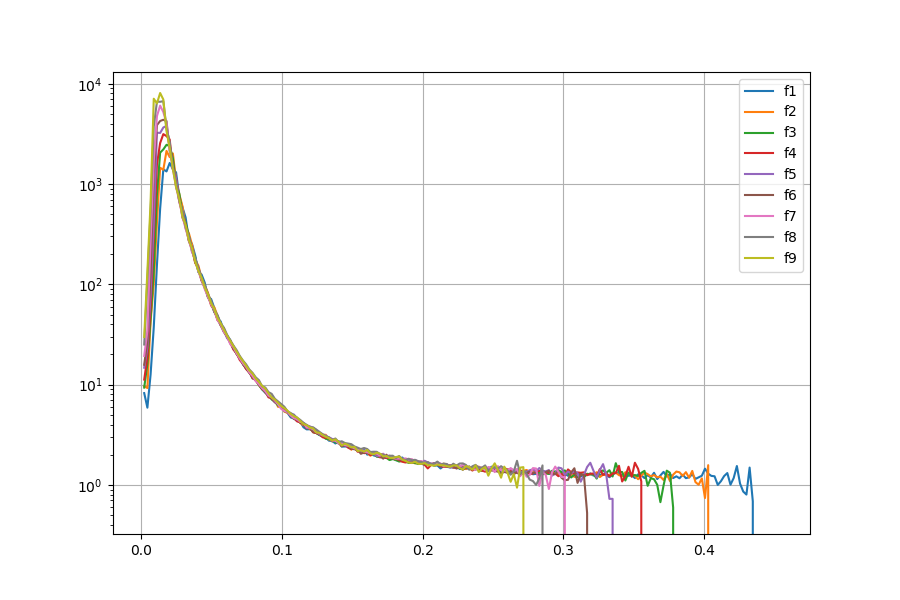

In [19]:
fig, ax = plt.subplots()
for fn in file_list:
    name = os.path.splitext(os.path.basename(fn))[0]
    data = dataset[fn]
    ax.semilogy(data['X'], data['Y'], label=name)
ax.legend()
ax.grid()

<IPython.core.display.Javascript object>


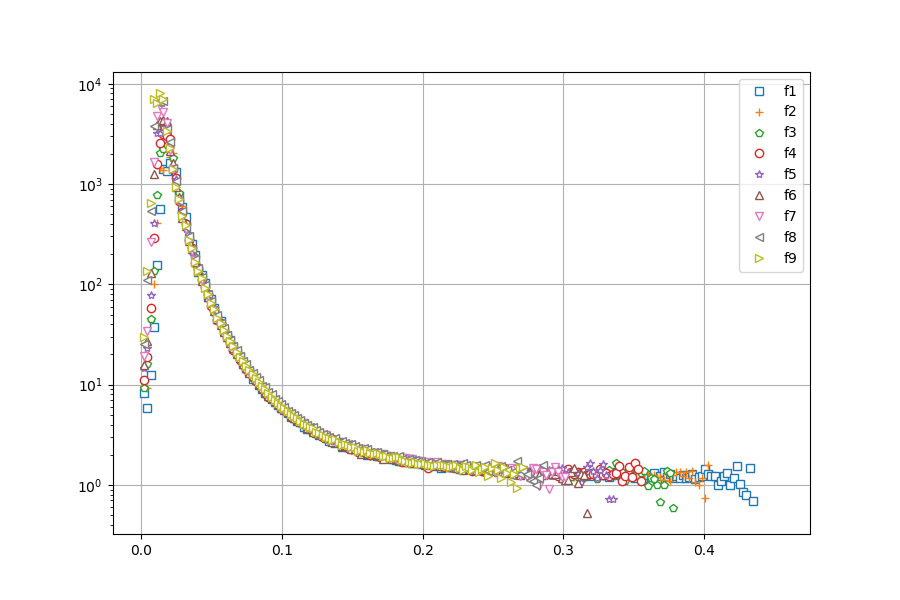

In [20]:
markers = ('s', '+', 'p', 'o', '*', '^', 'v', '<', '>', '1') 

fig, ax = plt.subplots()
for i, fn in enumerate(file_list):
    name = os.path.splitext(os.path.basename(fn))[0]
    data = dataset[fn]
    marker = markers[i]
    ax.semilogy(data['X'], data['Y'], marker, markerfacecolor='white', label=name)
ax.legend()
ax.grid()

##  Grid

<IPython.core.display.Javascript object>


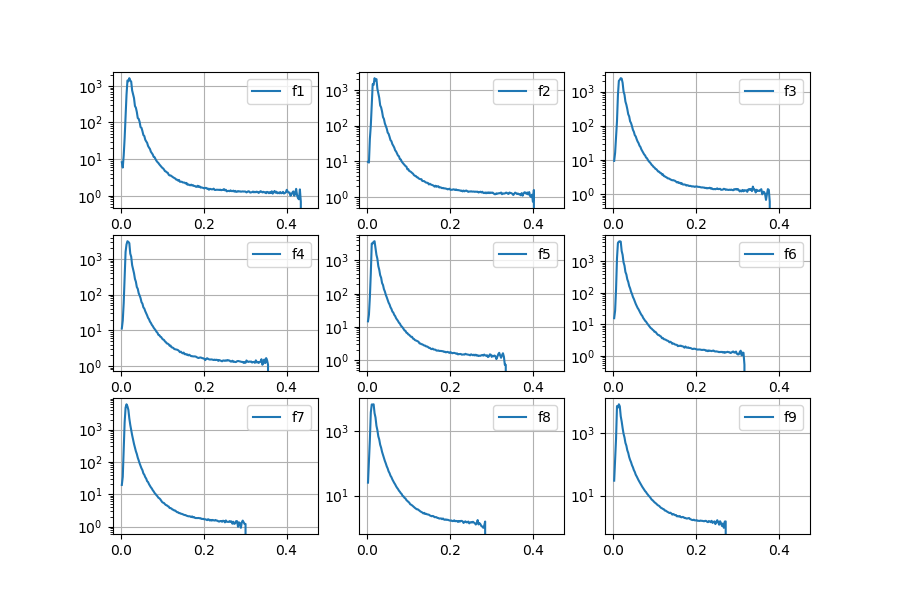

In [21]:
N = len(dataset)
ncols = 3
nrows = (N-1)//ncols+1
fig, axes = plt.subplots(nrows, ncols)
for irow in range(nrows):
    for icol in range(ncols):
        index = icol + irow * ncols
        if index >=N:break
        fn = file_list[index]
        name = os.path.splitext(os.path.basename(fn))[0]
        data = dataset[fn]
        ax1 = axes[irow][icol]
        ax1.semilogy(data['X'], data['Y'], label=name)
        ax1.legend()
        ax1.grid()